In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from keras.models import Sequential

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers import Conv2D
from keras.layers import GRU
from keras.layers import MaxPool2D
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import os
tf.__version__

'2.6.2'

In [2]:
df = pd.read_csv("dataframe.csv")

In [3]:
df.head()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,...,artist_Zkr,artist_Zucchero,artist_a-ha,artist_benny blanco,artist_blink-182,artist_my bloody valentine,artist_reezy,artist_t-low,artist_will.i.am,artist_Öwnboss
0,1,123133,0.684,0.708,0.498,0.000000,0.3650,0.905,-10.836,0.0300,...,0,0,0,0,0,0,0,0,0,0
1,0,162693,0.383,0.314,0.292,0.000013,0.0581,0.593,-15.230,0.0293,...,0,0,0,0,0,0,0,0,0,0
2,1,142773,0.759,0.067,0.621,0.000291,0.0623,0.921,-12.539,0.0314,...,0,0,0,0,0,0,0,0,0,0
3,0,170200,0.647,0.843,0.282,0.001340,0.1820,0.753,-15.042,0.0319,...,0,0,0,0,0,0,0,0,0,0
4,1,125266,0.492,0.470,0.428,0.000000,0.2040,0.871,-13.132,0.0352,...,0,0,0,0,0,0,0,0,0,0


# Split and Scale

In [4]:
y = df.loc[:,'popularity']
X = df.drop('popularity', axis=1)

StandardScaling using because values of mean all over the places 

In [5]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
#scaler.fit(X_train)
#X_train= pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
#
#scaler.fit(X_test)
#X_test= pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print(X_train.shape, X_test.shape)

(1980, 1590) (1320, 1590)


In [7]:
X_train

array([[-0.71869045,  0.42954127, -0.45891807, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [ 1.07127547, -1.9086915 , -0.66548106, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [-0.04718892, -0.37146543, -0.79621058, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       ...,
       [ 0.79520155,  0.21162033, -0.40513835, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [-0.71128197,  1.77240543,  0.10576893, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [ 0.37302624,  1.28944551, -0.75103969, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ]])

In [8]:
y_train

133     4
544     2
962     1
463     1
247     1
       ..
3195    1
1344    1
527     4
3197    2
1289    2
Name: popularity, Length: 1980, dtype: int64

In [9]:
X_train.mean()

-7.795999877650686e-05

In [10]:
X_train.var()

0.9930627833612602

In [11]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train= pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

#scaler.fit(X_test)
#X_test= pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

#X = MinMaxScaler().fit_transform(X)
#X_train = MinMaxScaler().fit_transform(X_train)
#X_test = MinMaxScaler().fit_transform(X_test)
#X = scaler.fit_transform(X)

# Modeling and Training

In [12]:
#setup folder where you will save logs for tensorflow 
root_logdir = os.path.join(os.curdir,"my_logs_ADS")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [13]:
#create keras Tensorboard callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [14]:
dummy = DummyClassifier(random_state=1)
dummy.fit(X_train, y_train)
dummypreds = dummy.predict(X_test)

print(f"Dummy Accuracy: {accuracy_score(y_test, dummypreds)}")

Dummy Accuracy: 0.16893939393939394


Check different Model performances

In [15]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "Linear SVC (Support Vector Machine)":LinearSVC(),
    "Support Vector Machine":SVC(),
    "Neural Network":MLPClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, " was trained")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression  was trained
KNeighborsClassifier  was trained
DecisionTreeClassifier  was trained


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Linear SVC (Support Vector Machine)  was trained
Support Vector Machine  was trained


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Neural Network  was trained
Random Forest  was trained
Gradient Boosting  was trained


In [16]:
for name, model in models.items():
    
    print(name + ": {:.2f}%".format(model.score(X_test, y_test)*100))

Logistic Regression: 32.80%
KNeighborsClassifier: 27.12%
DecisionTreeClassifier: 25.00%
Linear SVC (Support Vector Machine): 32.20%
Support Vector Machine: 31.97%
Neural Network: 32.27%
Random Forest: 31.67%
Gradient Boosting: 31.97%


## ANN 

In [17]:
model = Sequential([
    Dense(units=8, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(5, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 100, callbacks=[tensorboard_cb])

Epoch 1/100
124/124 [==============================] - 1s 1ms/step - loss: 1.8097 - accuracy: 0.1869
Epoch 2/100
124/124 [==============================] - 0s 1ms/step - loss: 1.5601 - accuracy: 0.2818
Epoch 3/100
124/124 [==============================] - 0s 1ms/step - loss: 1.4399 - accuracy: 0.3540
Epoch 4/100
124/124 [==============================] - 0s 1ms/step - loss: 1.3359 - accuracy: 0.4278
Epoch 5/100
124/124 [==============================] - 0s 1ms/step - loss: 1.2311 - accuracy: 0.4874
Epoch 6/100
124/124 [==============================] - 0s 1ms/step - loss: 1.1320 - accuracy: 0.5293
Epoch 7/100
124/124 [==============================] - 0s 1ms/step - loss: 1.0444 - accuracy: 0.5545
Epoch 8/100
124/124 [==============================] - 0s 1ms/step - loss: 0.9725 - accuracy: 0.5859
Epoch 9/100
124/124 [==============================] - 0s 1ms/step - loss: 0.9219 - accuracy: 0.6030
Epoch 10/100
124/124 [==============================] - 0s 1ms/step - loss: 0.8789 - accura

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 12728     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 12,873
Trainable params: 12,873
Non-trainable params: 0
_________________________________________________________________


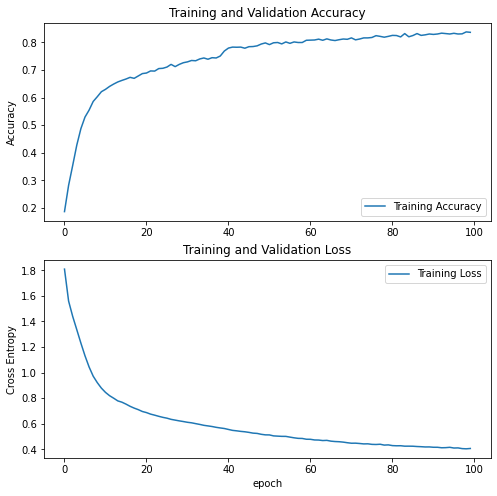

In [21]:
acc = history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)
print('\nTest accuracy=', test_acc)
print('\nTest loss=', test_loss)

42/42 - 0s - loss: 4.3442 - accuracy: 0.2848

Test accuracy= 0.28484848141670227

Test loss= 4.344178199768066


In [23]:
X_test

array([[-0.62897067,  0.54733637, -0.79758359, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [ 5.02144607, -1.56708571, -0.77654432, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [-0.97304826, -0.19477277,  1.06728502, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       ...,
       [-0.85060769,  0.11738425, -0.64551738, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [-0.19495722,  0.40598225, -0.33424691, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ],
       [ 1.24393935,  0.44721053, -0.64877675, ..., -0.0174104 ,
        -0.0174104 , -0.0174104 ]])

In [24]:
# Predicting the Test set results
predictions = model.predict(X_test)
print(predictions)

[[7.1543184e-24 9.9520564e-01 4.7943136e-03 1.3724550e-08 7.5172970e-08]
 [9.9960977e-01 3.8909438e-04 1.1428275e-06 5.2164534e-08 1.4720083e-08]
 [5.2668462e-03 1.1634342e-01 5.1163483e-01 2.8772792e-01 7.9026915e-02]
 ...
 [2.1107239e-04 3.5560128e-01 2.9976511e-01 2.0271050e-02 3.2415149e-01]
 [1.2301496e-01 1.5954617e-02 9.6179716e-02 2.2155873e-01 5.4329193e-01]
 [3.0048531e-02 3.0658614e-02 6.7006564e-03 9.3200397e-01 5.8817398e-04]]


In [25]:
predictions[0]

array([7.1543184e-24, 9.9520564e-01, 4.7943136e-03, 1.3724550e-08,
       7.5172970e-08], dtype=float32)

In [26]:
pred = np.argmax(predictions, axis = 1)[:5]
print(pred)
print(y_test)

[1 0 2 1 2]
2503    1
1467    0
51      2
2648    0
1249    2
       ..
760     0
1426    0
65      1
476     1
243     2
Name: popularity, Length: 1320, dtype: int64


In [27]:
#label = np.argmax(y_test, axis = 1)[:5]
#print(label)

In [28]:
model.save('hitpredictionmodel.h5')

In [29]:
# TensorBoard

In [30]:
%load_ext tensorboard
%tensorboard --logdir my_logs_ADS